In [48]:
'''
************************************************
** COL774 Machine Learning
** Assignment 1: Least Squares Linear Regression
** Question 2
** @Author: Aman Bhardwaj
** @Entry No. 2019SIY7580
** @Date: 23 Jan 2020
************************************************
'''

import numpy as np
import pandas as pa
import math
import matplotlib.pyplot as plt
import seaborn as sns

#Sample Training Dataset DTrain
#For given Theta coefficients [t0,t1,t2] = [3,1,2] (as per question) and x = [x0=1,x1,x2]
#Also for Gaussian noise epsilon (ep) and given Standard Deviation sqrt(2)
def sampleData(n, theta, standDev):
    thetaArr = np.array(theta[1:])
    thetaMat = thetaArr.reshape(len(thetaArr),1) #Create Matrix of theta x 1
    l = len(thetaArr)
    
    x1 = np.random.normal(3, 2, n)
    x2 = np.random.normal(-1, 2, n)
    #plt.plot(x1)
    #plt.show()
    #plt.plot(x2)
    #plt.show()
    x = np.c_[x1,x2]
    ep = np.random.normal(0, standDev, n) #calculate noise values
    #sns.distplot(ep) #Plot PDF of ep Noise to show it is Gaussian Noise and follows Nornal Distribution
    #plt.xlabel("Gaussian Noise Value")
    #plt.ylabel("Density")
    #plt.title("Gaussian Noise added in Samples Generation")
    #plt.show()
    
    #xDotTheta = np.dot(x,thetaMat)
    
    y = theta[0] + theta[1]*x1 + theta[2]*x2 + ep # y = (x*t)Transpose + noise(ep)
    return x,y


theta = [3,1,2] #for sampling
n = 1000000 #sample size
x,y = sampleData(n, theta, math.sqrt(2))
#for i in range(2):
#    xtemp,ytemp = sampleData(n, theta, math.sqrt(2))    
#    x = np.append(x,xtemp, axis=0)
#    y = np.append(y,ytemp, axis=1)    
#    print(x.shape, y.shape)
x = np.c_[np.ones(n),x]
y = y.T
#X = pa.DataFrame(x)
#Y = pa.DataFrame(y.T)
#plt.plot(Y)
#plt.show()
#x = pa.read_csv('q2test.csv')
#Y = x[['Y']]
#x = x[['X_1','X_2']]
#x = np.c_[np.ones(n),x]
#X = pa.DataFrame(x)

----------Results---------
Number of epoch: 5.0
Learning Rate: 0.001
Final Parameters i.e. Theta values
Stopping Criteria: Difference in J(i) - J(i-1)<= Epsilon(ep). ep = ) 1.1e-19
----------------------------------


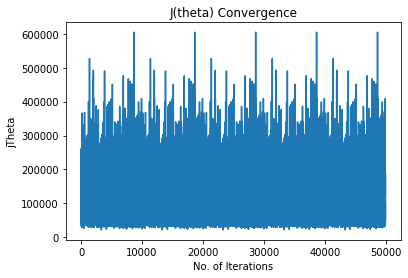

In [54]:
def errorFunction(xb, yb, t, bs):
    error = yb - (xb @ t)
    sumOfLeastSquares = np.sum(error**2)
    errorFun = sumOfLeastSquares/(2)
    return errorFun


def batchGradientDescent(ep, maxIterations, bs, lr):
    jThetaList = []
    jPrev = 0.0
    thetaList = []
    count = 0
    converge = False
    currentBatch = 0
    t = np.zeros((3,1))#as per instructions taking Theta0 = vector of 0s
    
    while not converge and count != maxIterations:
        start = currentBatch*bs
        end = (currentBatch+1)*bs
        xb = x[start:end]
        yb = y[start:end]
        #print(xb)
        gradient = xb.T@(yb - (xb @ t))
        
        t = t + lr*(gradient)
        thetaList.append(t)
        count += 1
        currentBatch += 1
        currentBatch = currentBatch%totalBatches
                
        jTheta = errorFunction(xb, yb, t, bs)
        jThetaList.append(jTheta)
        jDiff = abs(jPrev - jTheta) < ep

        if jDiff:
            converge = True
        jPrev = jTheta
    return jThetaList, thetaList, count

def reportResults(i, t, lr, ep):
    print("----------Results---------")
    print("Number of epoch:", i/totalBatches)    
    print("Learning Rate:", lr)
    print("Final Parameters i.e. Theta values")
    #print("Theta[0]",t[0])
    #print("Theta[1]",t[1])
    #print("Theta[2]",t[2])
    print("Stopping Criteria: Difference in J(i) - J(i-1)<= Epsilon(ep). ep = )",ep)
    print("----------------------------------")
    return

def plotGradDescent(jTheta):    
    plt.plot(jTheta[50:])
    plt.xlabel("No. of Iterations")
    plt.ylabel("jTheta")
    plt.title("J(theta) Convergence")
    plt.show()

bSize = 100 #Batch Size
LR = 0.001 #Learning Rate
epsilon = 1.1e-19
totalBatches = round(n/bSize)
jThetaList, thetaList, itr = batchGradientDescent(epsilon, 50000, bSize, LR)
reportResults(itr, thetaList[-1], LR, epsilon)
plotGradDescent(jThetaList)


#print("ITR", itr, "JT", jThetaList[-1], "Theta", thetaList[-1])
#print(X)
#plt.plot(X)
#plt.plot(y,"o")
#plt.show()
#print(x)
#plt.show()
#plt.plot(x,"o")
#plt.show()

----------Results---------
Number of epoch: 0.012835
Learning Rate: 0.001
Final Parameters i.e. Theta values
Stopping Criteria: Difference in J(i) - J(i-1)<= Epsilon(ep). ep = ) 1.1e-06
----------------------------------


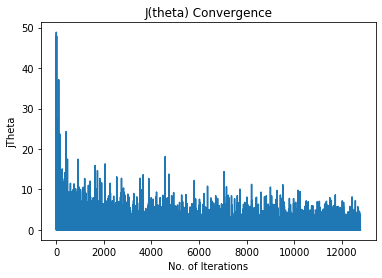

In [51]:

bSize = 1 #Batch Size
LR = 0.001 #Learning Rate
epsilon = 1.1e-6
totalBatches = round(n/bSize)
jThetaList, thetaList, itr = batchGradientDescent(epsilon, 100000000, bSize, LR)
reportResults(itr, thetaList[-1], LR, epsilon)
plotGradDescent(jThetaList)

In [ ]:
bSize = 10000 #Batch Size
LR = 0.001 #Learning Rate
epsilon = 2.1e-7
totalBatches = round(n/bSize)
jThetaList, thetaList, itr = batchGradientDescent(epsilon, 10000, bSize, LR)
reportResults(itr, thetaList[-1], LR, epsilon)
plotGradDescent(jThetaList)

In [ ]:

bSize = 1000000 #Batch Size
LR = 0.001 #Learning Rate
epsilon = 1.1e-6
totalBatches = round(n/bSize)
jThetaList, thetaList, itr = batchGradientDescent(epsilon, 4000, bSize, LR)
reportResults(itr, thetaList[-1], LR, epsilon)
plotGradDescent(jThetaList)

In [ ]:
xData = pa.read_csv('q2test.csv')

print(xData)
plt.plot(xData['X_1'])
plt.title("xData['X_1']")
plt.show()
plt.plot(xData['X_2'])
plt.title("xData['X_2']")
plt.show()
plt.plot(xData['Y'])
plt.title("xData['Y']")
plt.show()

plt.plot(X[1])
plt.title("X1")
plt.show()
plt.plot(X[2])
plt.title("X2")
plt.show()
plt.plot(Y)
plt.title("Y")
plt.show()

sns.distplot(xData['X_1'])
sns.distplot(x[1])

In [46]:
def errorFunction(xb, yb, t, bs):
    error = yb - (xb @ t)
    sumOfLeastSquares = np.sum(error**2)
    errorFun = sumOfLeastSquares/(2*bs)
    return errorFun


def batchGradientDescent(ep, maxIterations, bs, lr):
    jThetaList = []
    jPrev = 0.0
    thetaList = []
    count = 0
    converge = False
    currentBatch = 0
    t = np.zeros((3,1))#as per instructions taking Theta0 = vector of 0s
    xb = X[0:100]
    yb = Y[0:100]
    while (count <= maxIterations):
        xb = X[0:100]
        yb = Y[0:100]
        #start = currentBatch*bs
        #end = (currentBatch+1)*bs
        #xb = X[start:end]
        #yb = Y[start:end]
        #print(xb)
        #gradient = xb.T@(yb - (xb @ t))
        
        #t = t + lr*(gradient/(bs))
        #thetaList.append(t)
        count += 1
        
        #currentBatch += 1
        #currentBatch = currentBatch%totalBatches
        
        #if(count%50 == 0):
        #jTheta = errorFunction(xb, yb, t, bs)
        #jThetaList.append(jTheta)
        #jDiff = abs(jPrev - jTheta) < ep

        #if jDiff[0]:
        #    converge = True
        #jPrev = jTheta
        #print(jTheta)
    return  count


In [47]:
#print(xb @ t)
#print(np.dot(xb, t))
bSize = 1 #Batch Size
LR = 0.001 #Learning Rate
epsilon = 2.1e-7
totalBatches = round(n/bSize)
itr = batchGradientDescent(epsilon, 10000, bSize, LR)
#reportResults(itr, thetaList[-1], LR, epsilon)

In [57]:
print(np.max(jThetaList), np.min(jThetaList))


604487.850045635 21829.95985168519
